### Feature Scaling

With any distance based machine learning model (regularized regression methods, neural networks, and now kmeans), we need to scale the data.  

If you have some features that are on completely different scales, this can greatly impact the clusters you get when using K-Means. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing as p

%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
import helpers2 as h
import tests as t


# Create the dataset for the notebook
data = h.simulate_data(200, 2, 4)
df = pd.DataFrame(data)
df.columns = ['height', 'weight']
df['height'] = np.abs(df['height']*100)
df['weight'] = df['weight'] + np.random.normal(50, 10, 200)

In [2]:
df.head()

,height,weight
0,650.565335,57.530355
1,512.894273,45.300683
2,885.057453,42.807086
3,1028.641210,63.879737
4,746.899195,58.161953


            height      weight
count   200.000000  200.000000
mean    569.726207   53.566652
std     246.966215   12.177634
min      92.998481   20.100796
25%     357.542793   45.511370
50%     545.766752   55.251422
75%     773.310607   62.914829
max    1096.222348   84.420899


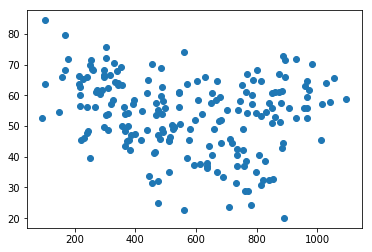

In [4]:
print(df.describe())
plt.scatter(df['height'], df['weight']);

There are two very common types of feature scaling:


**I.  MinMaxScaler**

In some cases if you want to think of data in terms of the percent they are as compared to the maximum value use **MinMaxScaler**.

**II. StandardScaler**

Another very popular type of scaling is to scale data so that it has mean 0 and variance 1.  In these cases, you will want to use **StandardScaler**.  

It is probably more appropriate with this data to use **StandardScaler**.  However, to see the effect on this data I'm going to use both

In [5]:
# Fitting and transforming the data using StandardScaler

df_ss = p.StandardScaler().fit_transform(df) 
print(df_ss)

[[ 0.32815009  0.32630721]
 [-0.23069775 -0.6804862 ]
 [ 1.28002343 -0.88576865]
 [ 1.86287266  0.84901257]
 [ 0.71919792  0.37830272]
 [ 0.17660848 -1.31122374]
 [-0.50730839 -1.62613691]
 [ 1.46626058  1.50622363]
 [-0.53665544  0.58058663]
 [ 0.14999227  0.40902249]
 [ 0.8562259  -2.40997468]
 [-0.33689058  0.52310376]
 [ 0.01041941  0.82470757]
 [ 0.67698073 -1.07040186]
 [ 1.3020229  -2.75503739]
 [ 0.81647098 -2.04323696]
 [-1.26489925  1.23415349]
 [ 1.60881585  0.47564205]
 [ 0.20138376  0.04015119]
 [-0.16385425 -0.31205027]
 [-0.38148919 -2.36418587]
 [ 0.67275166 -0.90163782]
 [ 1.14405103  0.58240696]
 [-1.32154201 -0.43015563]
 [ 0.99822708  0.91218885]
 [-1.0193475   1.07786619]
 [-0.82690773 -0.43588545]
 [ 0.5415713   0.14357264]
 [-1.37891426 -0.61436516]
 [-0.93133848  1.18306527]
 [ 1.09671473 -1.75300524]
 [-0.45963163 -1.82312057]
 [ 1.97046443  0.98277441]
 [ 1.610146    0.20096561]
 [-1.44083154  0.83918184]
 [-0.38877189  0.13382075]
 [ 1.10743093  0.32833981]
 

     height    weight
0  0.328150  0.326307
1 -0.230698 -0.680486
2  1.280023 -0.885769
3  1.862873  0.849013
4  0.719198  0.378303


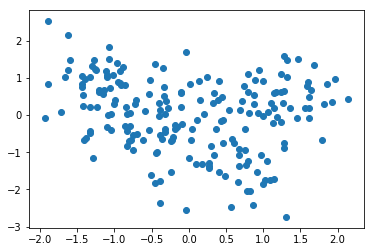

In [6]:
df_ss = pd.DataFrame(df_ss) #creating a dataframe
df_ss.columns = ['height', 'weight'] #addding column names 
print(df_ss.head())
plt.scatter(df_ss['height'], df_ss['weight']); # creating a plot

In [7]:
# fitting and transforming MinMaxScaler
df_mms = p.MinMaxScaler().fit_transform(df)

     height    weight
0  0.555775  0.581926
1  0.418546  0.391789
2  0.789514  0.353020
3  0.932636  0.680642
4  0.651799  0.591746


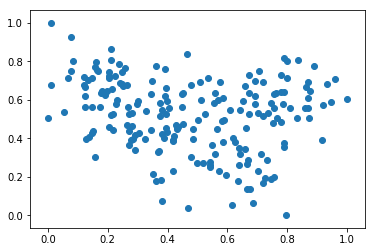

In [9]:

df_mms = pd.DataFrame(df_mms)
df_mms.columns = ['height', 'weight']
print(df_mms.head())
plt.scatter(df_mms['height'], df_mms['weight']);

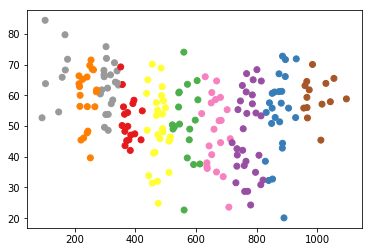

In [11]:
def fit_kmeans(data, centers):
    '''
    INPUT:
        data = the dataset you would like to fit kmeans to (dataframe)
        centers = the number of centroids (int)
    OUTPUT:
        labels - the labels for each datapoint to which group it belongs (nparray)
    
    '''
    kmeans = KMeans(centers)
    labels = kmeans.fit_predict(data)
    return labels

labels = fit_kmeans(df, 10) #fitting kmeans to get the labels

# Plotting the original data with clusters
plt.scatter(df['height'], df['weight'], c=labels, cmap='Set1');
#print(labels)

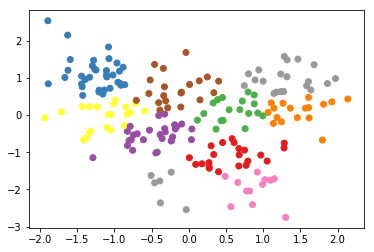

In [12]:
#plotting Standardized scaler of the scaled datasets
StandardizedScaler = fit_kmeans(df_ss, 10)
plt.scatter(df_ss['height'], df_ss['weight'], c=StandardizedScaler, cmap='Set1');
#print(StandardizedScaler)

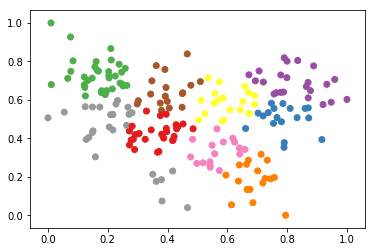

In [13]:
# plotting MinMaxScaler data
MinMaxScaler = fit_kmeans(df_mms, 10)
plt.scatter(df_mms['height'], df_mms['weight'], c=MinMaxScaler, cmap='Set1');
#print(MinMaxScaler)

# As you can see, the feature scaling has significant effect on clustering of data points